# Advanced Analysis of Tech Stock Prices

Project Overview:

This analytical project provides an in-depth financial examination of ten leading technology companies: Apple (AAPL), Amazon (AMZN), Alibaba (BABA), Salesforce (CRM), Facebook (FB), Alphabet (GOOG), Intel (INTC), Microsoft (MSFT), Nvidia (NVDA), and Tesla (TSLA). Leveraging historical daily stock data, the analysis addresses four key financial questions, combining exploratory, visual, and advanced statistical methods to yield meaningful investment insights.

In [7]:
import pandas as pd
aapl = pd.read_csv("data/AAPL.csv")
print(aapl.shape)
aapl.head(100)

(2999, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553025,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459939,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447999,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490865,447610800
...,...,...,...,...,...,...,...
95,2010-05-20,8.638571,8.708929,8.436071,8.491429,7.280255,1282915200
96,2010-05-21,8.315000,8.732143,8.262500,8.654286,7.419883,1223891200
97,2010-05-24,8.831429,8.960714,8.795000,8.812857,7.555838,754238800
98,2010-05-25,8.548214,8.812857,8.470000,8.757857,7.508681,1048006400


## Data Dictionary

| Column    | Explanation                                                                            |
| --------- | -------------------------------------------------------------------------------------- |
| Date      | Date of observation                                                                    |
| Open      | Opening price                                                                          |
| High      | Highest price during trading day                                                       |
| Low       | Lowest price during trading day                                                        |
| Close     | Close price                                                                            |
| Adj Close | Adjusted close price adjusted for splits and dividend and/or capital gain distribution |
| Volume    | Number of shares traded during trading day                                             |

[Source](https://finance.yahoo.com/) of dataset.

📊 Analyses Performed

Analysis 1: Highest Recent Closing Price
• Objective: Identify the stock with the highest recent closing price.
• Method: Extracted the most recent closing prices from each dataset.
• Result: Amazon (AMZN) had the highest recent closing price at $3507.07, indicating strong current market valuation.

Analysis 2: Monthly Closing Price Visualization
• Objective: Visualize and compare historical performance trends of each stock.
• Method: Resampled daily closing prices to monthly frequency and visualized through line charts.
• Insight: Visualization revealed clear long-term growth trends and highlighted periods of volatility, aiding strategic investment planning.

Analysis 3: Greatest Percent Increase in Closing Price
• Objective: Determine the company with the most significant growth over the entire dataset period.
• Method: Calculated percentage increases in stock prices from initial to most recent observations.
• Result: Tesla (TSLA) showed the greatest historical growth, soaring 23,919.30%, reflecting extraordinary market performance and investor returns.

Analysis 4: Volatility Clustering and Autocorrelation
• Objective: Examine whether periods of high volatility tend to follow one another (“clustering”) and measure autocorrelation of volatility.
• Method: Computed squared daily returns to measure volatility; utilized autocorrelation functions to identify patterns.
• Findings: Demonstrated significant volatility clustering, indicating persistent market risk conditions across most analyzed stocks, critical for risk management and portfolio diversification.

**Setup and Data Loading:**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock symbols
stocks = ["AAPL", "AMZN", "BABA", "CRM", "FB", "GOOG", "INTC", "MSFT", "NVDA", "TSLA"]

# Load the data for each stock
stock_data = {}
for stock in stocks:
    file_path = f'data/{stock}.csv'
    stock_data[stock] = pd.read_csv(file_path, parse_dates=['Date'])

# Check the data for Apple as an example
aapl = stock_data['AAPL']
print(aapl.shape)
print(aapl.head(100))

(2999, 7)
         Date      Open      High       Low     Close  Adj Close      Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.553025   493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.564355   601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.459939   552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.447999   477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.490865   447610800
..        ...       ...       ...       ...       ...        ...         ...
95 2010-05-20  8.638571  8.708929  8.436071  8.491429   7.280255  1282915200
96 2010-05-21  8.315000  8.732143  8.262500  8.654286   7.419883  1223891200
97 2010-05-24  8.831429  8.960714  8.795000  8.812857   7.555838   754238800
98 2010-05-25  8.548214  8.812857  8.470000  8.757857   7.508681  1048006400
99 2010-05-26  8.931429  9.004643  8.705357  8.718214   7.474692   850654000

[100 rows x 7 columns]


**Analysis 1: Highest Recent Closing**

In [9]:
# Calculate the most recent closing price for each stock and determine the highest
recent_closes = {stock: df.iloc[-1]['Close'] for stock, df in stock_data.items()}
highest_recent_close_stock = max(recent_closes, key=recent_closes.get)
highest_recent_close_price = recent_closes[highest_recent_close_stock]
print(f"Stock with the highest recent close: {highest_recent_close_stock} (${highest_recent_close_price:.2f})")

Stock with the highest recent close: AMZN ($3507.07)


Analysis 2: Visualize Monthly Closing Prices

/var/folders/_8/mhxp_ndj5dx5j00m7k29qc3h0000gn/T/ipykernel_1238/686419161.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Date').last()
/var/folders/_8/mhxp_ndj5dx5j00m7k29qc3h0000gn/T/ipykernel_1238/686419161.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Date').last()
/var/folders/_8/mhxp_ndj5dx5j00m7k29qc3h0000gn/T/ipykernel_1238/686419161.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Date').last()
/var/folders/_8/mhxp_ndj5dx5j00m7k29qc3h0000gn/T/ipykernel_1238/686419161.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Date').last()
/var/folders/_8/mhxp_ndj5dx5j00m7k29qc3h0000gn/T/ipykernel_1238/686419161.py:4: Futu

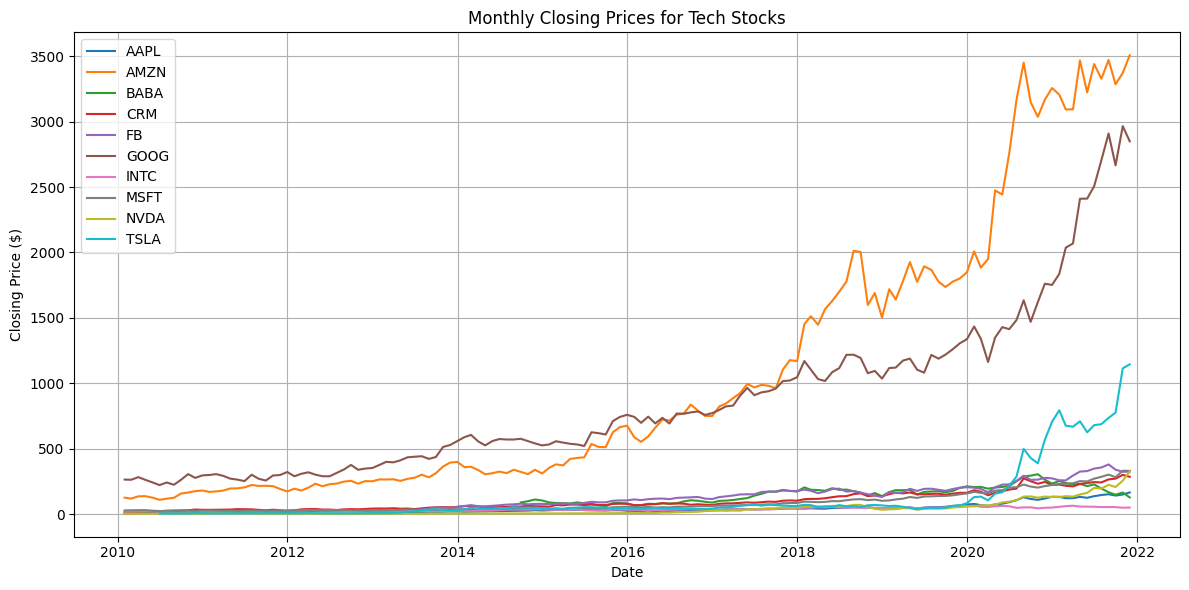

In [10]:
# Plot the closing price at the end of each month for all stocks
plt.figure(figsize=(12, 6))
for stock, df in stock_data.items():
    df_monthly = df.resample('M', on='Date').last()
    plt.plot(df_monthly.index, df_monthly['Close'], label=stock)
plt.title('Monthly Closing Prices for Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis 3: Greatest Percent Increase in Closing Price

In [11]:
# Determine which stock had the greatest percentage increase in closing price
percent_increases = {}
for stock, df in stock_data.items():
    initial_price = df.iloc[0]['Close']
    recent_close = df.iloc[-1]['Close']
    percent_increase = ((recent_close - initial_price) / initial_price) * 100
    percent_increases[stock] = percent_increase
greatest_increase_stock = max(percent_increases, key=percent_increases.get)
greatest_increase_value = percent_increases[greatest_increase_stock]
print(f"Stock with the greatest percent increase: {greatest_increase_stock} ({greatest_increase_value:.2f}%)")

Stock with the greatest percent increase: TSLA (23919.30%)


**4. Volatility Clustering and Autocorrelation**

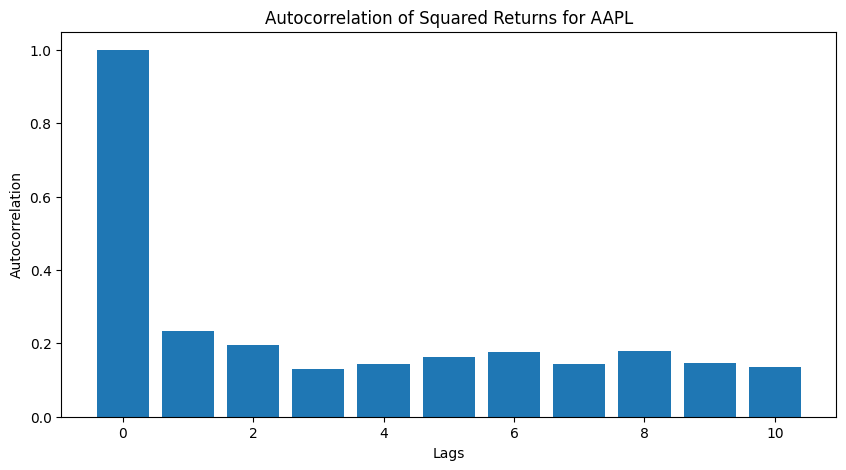

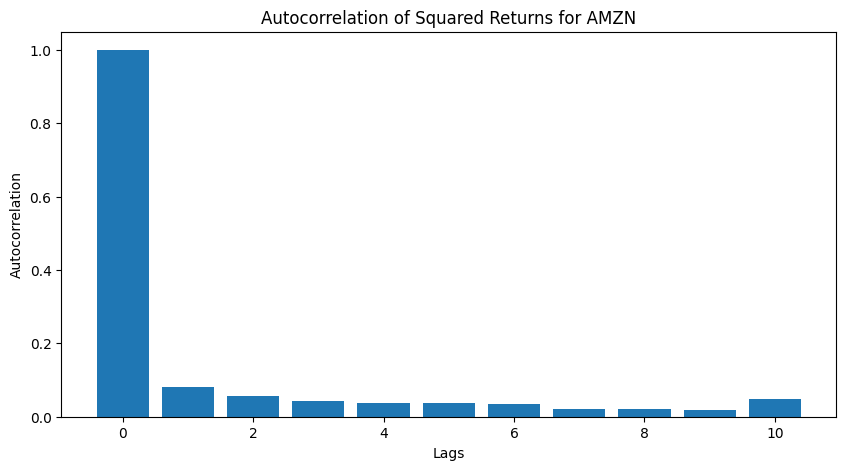

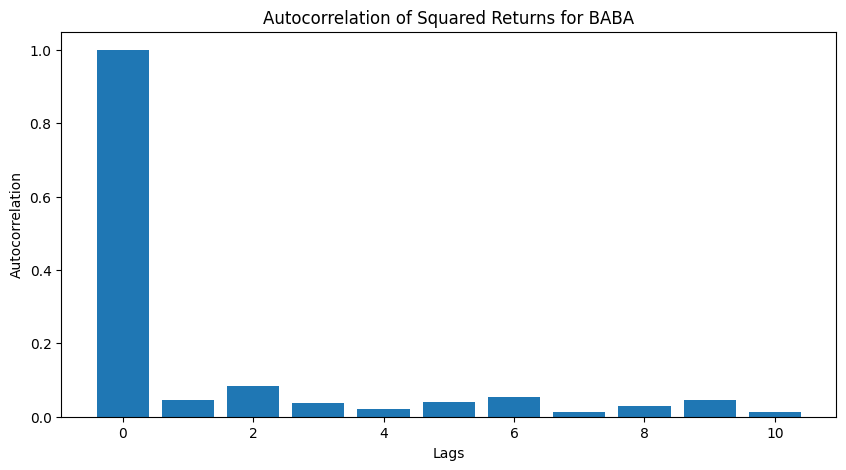

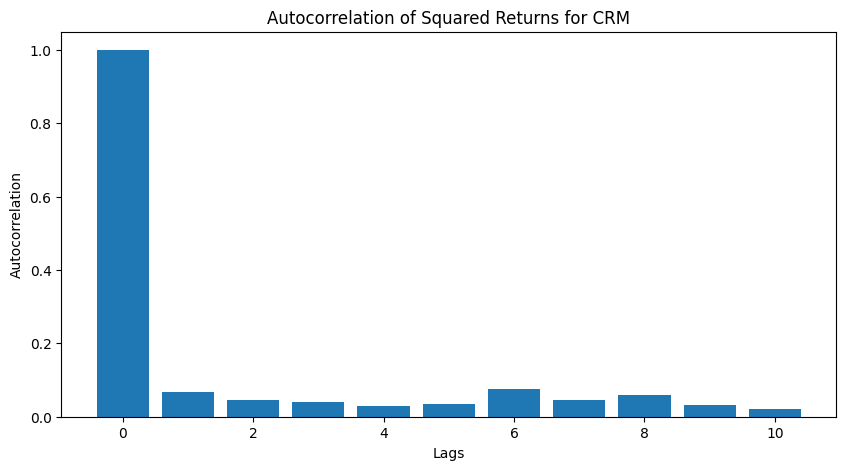

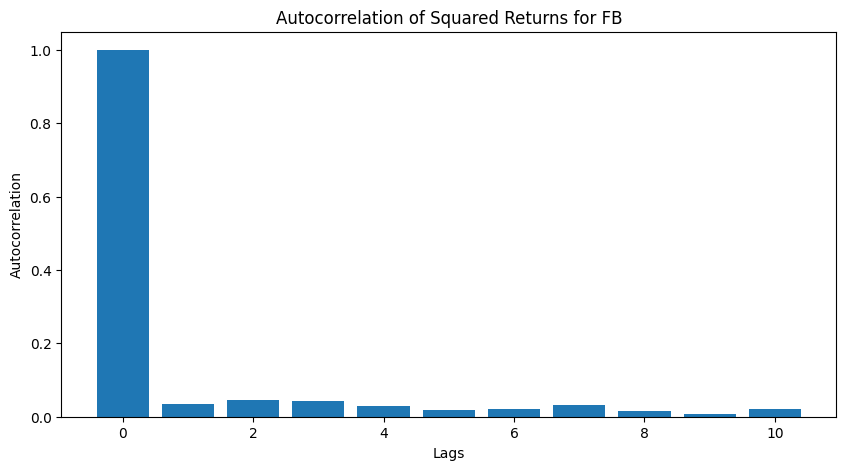

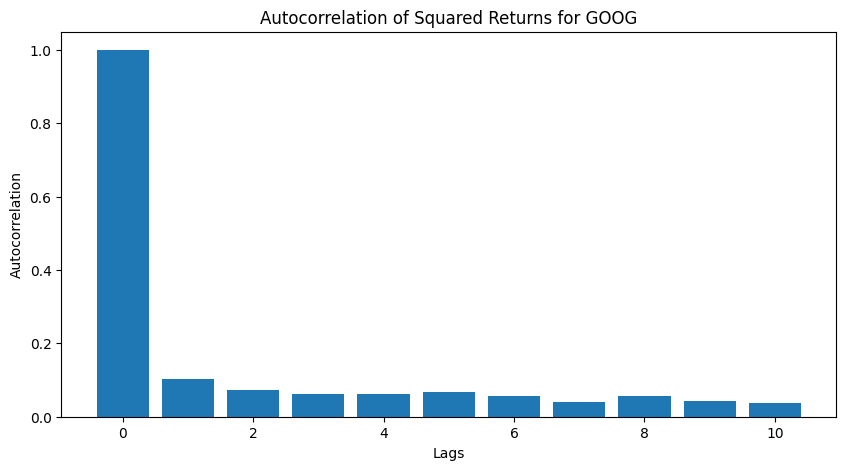

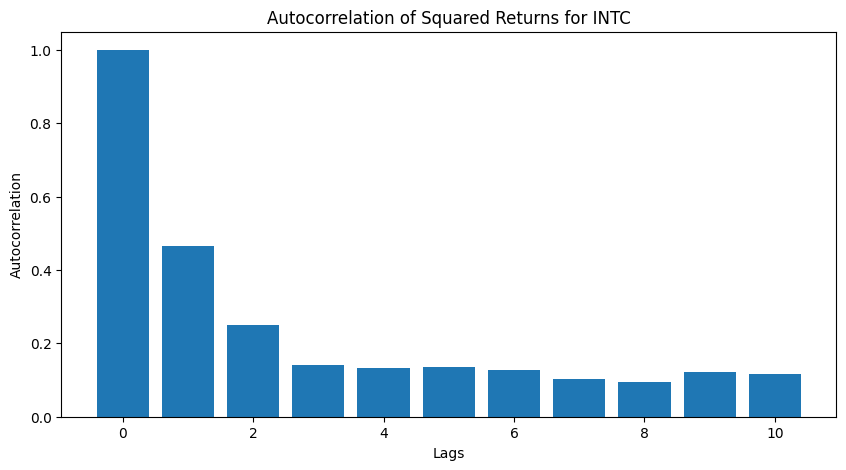

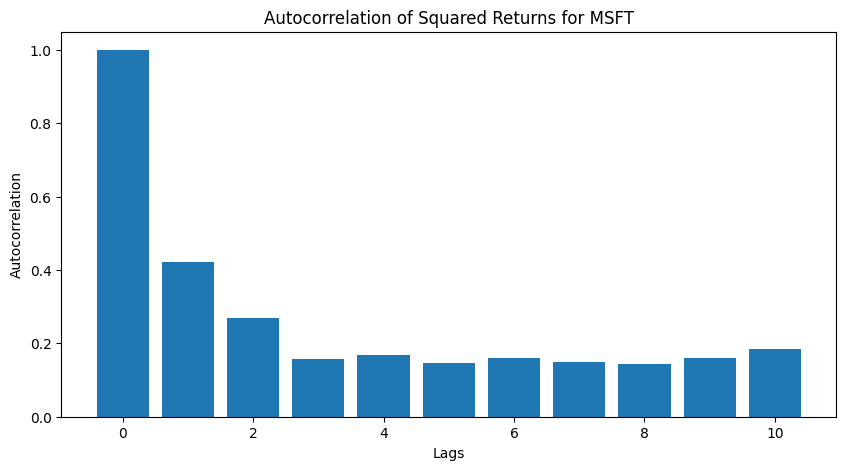

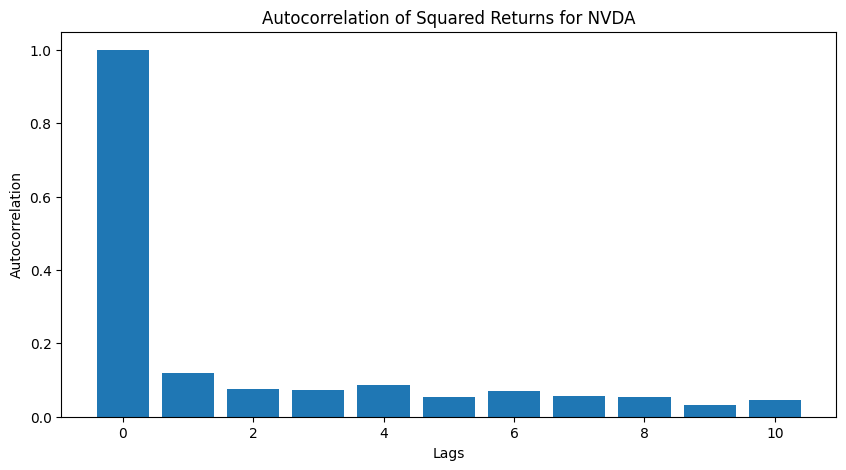

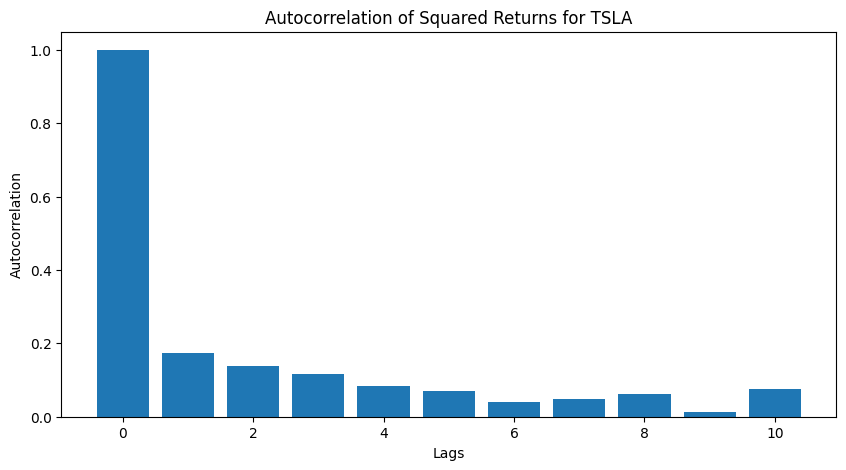

In [12]:
# Volatility clustering with autocorrelation analysis of stock returns
import statsmodels.api as sm

for stock, df in stock_data.items():
    # Calculate daily returns
    df['Returns'] = df['Close'].pct_change()
    # Calculate squared returns
    df['Squared Returns'] = df['Returns']**2
    # Autocorrelation of squared returns
    autocorr = sm.tsa.acf(df['Squared Returns'].dropna(), nlags=10)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(autocorr)), autocorr)
    plt.title(f'Autocorrelation of Squared Returns for {stock}')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

**Conclusion**

Through a blend of exploratory, visual, and advanced statistical analyses, this project delivers valuable insights into the performance dynamics of prominent technology stocks. Investors and financial analysts can leverage these findings to make informed decisions about risk management, portfolio allocation, and investment strategy.